In [43]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [44]:
df1 = pd.read_csv('cooling_system.csv')

In [45]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [46]:
df1.shape

(92559, 3)

In [47]:
#df = df1.sample(frac=0.1, replace=False)

In [66]:
#df = df1.sample(frac=1, replace=False)
#df.sort_index(inplace=True)
seq_len = 32 
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=4,                       #was 4
    feature_num_units=100,                      #was 50
    feature_noise_dim=10,
    batch_size=256,
    epochs=5000,  # For real data sets, 100-1000 epochs is typical     #was 5k
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['64817-1598', '65262-110', '65263-111'],
)

2023-11-16 17:15:41,125 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 32!
2023-11-16 17:15:42,263 : MainThread : INFO : epoch: 0
2023-11-16 17:15:44,753 : MainThread : INFO : epoch: 1
2023-11-16 17:15:45,153 : MainThread : INFO : epoch: 2
2023-11-16 17:15:45,553 : MainThread : INFO : epoch: 3
2023-11-16 17:15:45,945 : MainThread : INFO : epoch: 4
2023-11-16 17:15:46,337 : MainThread : INFO : epoch: 5
2023-11-16 17:15:46,729 : MainThread : INFO : epoch: 6
2023-11-16 17:15:47,113 : MainThread : INFO : epoch: 7
2023-11-16 17:15:47,497 : MainThread : INFO : epoch: 8
2023-11-16 17:15:47,881 : MainThread : INFO : epoch: 9
2023-11-16 17:15:48,266 : MainThread : INFO : epoch: 10
2023-11-16 17:15:48,650 : MainThread : INFO : epoch: 11
2023-11-16 17:15:49,058 : MainThread : INFO : epoch: 12
2023-11-16 17:15:49,466 : MainThread : INFO : epoch: 13
2023-11-16 17:15:49,858 : MainThread : INFO : epoch: 14
2023-11-16 17:15:50,266 : MainThre

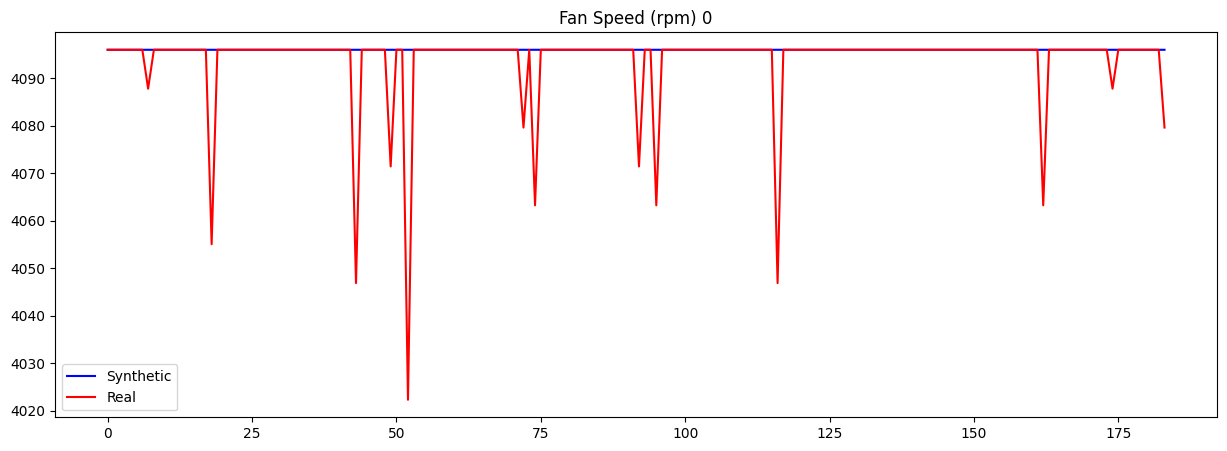

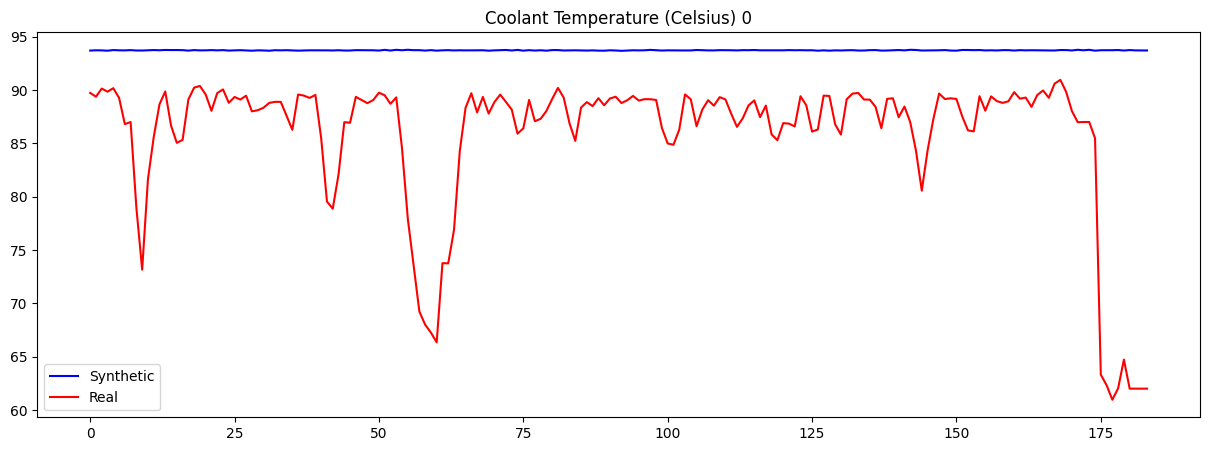

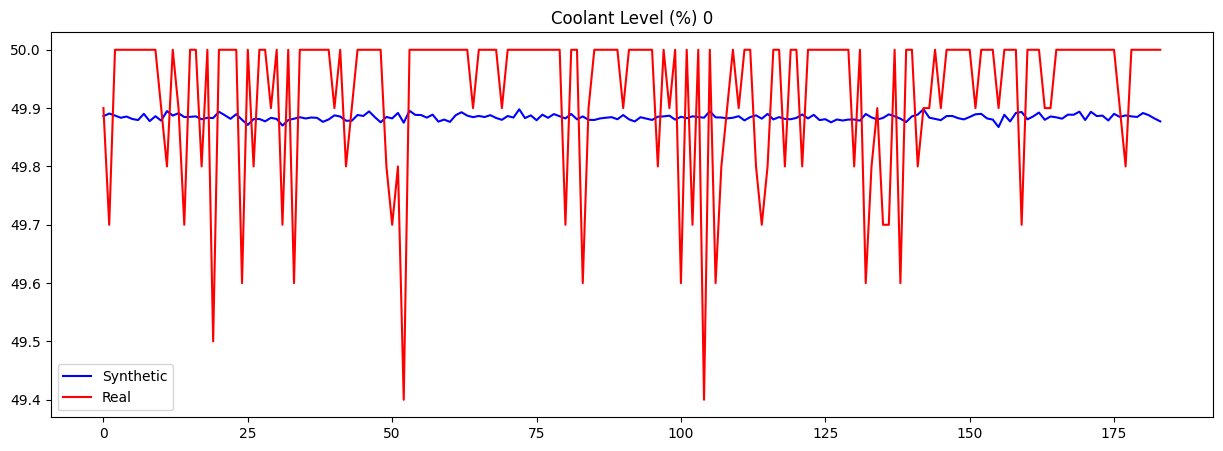

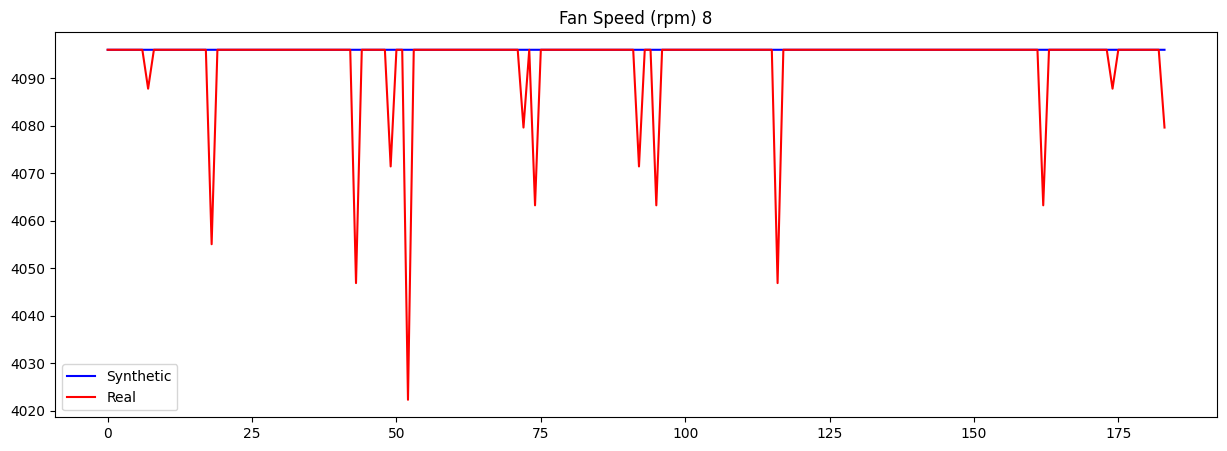

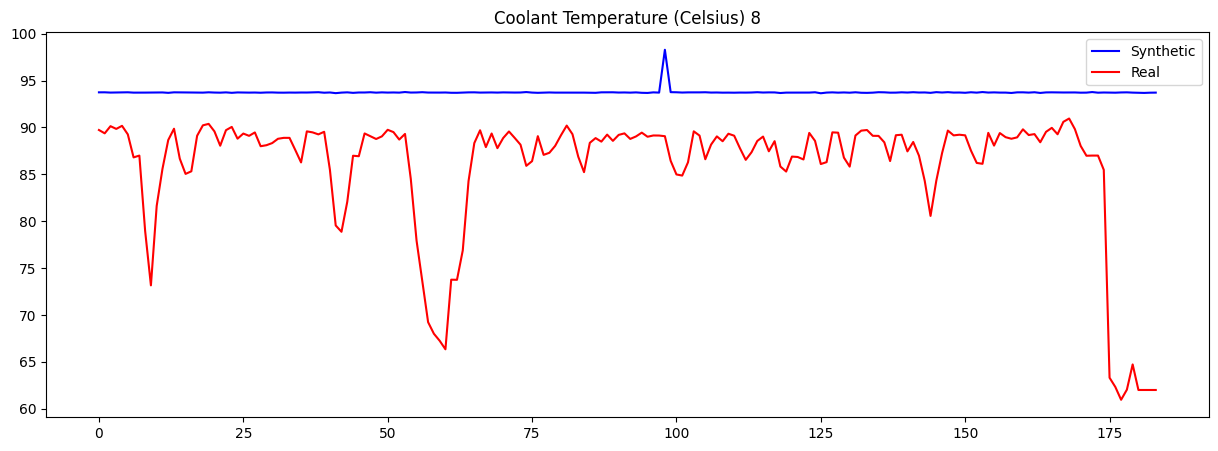

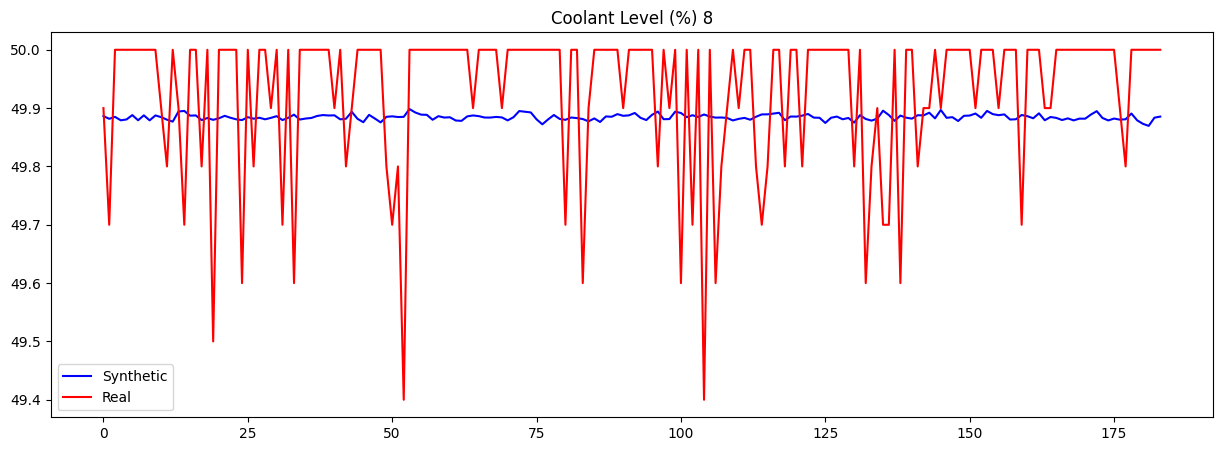

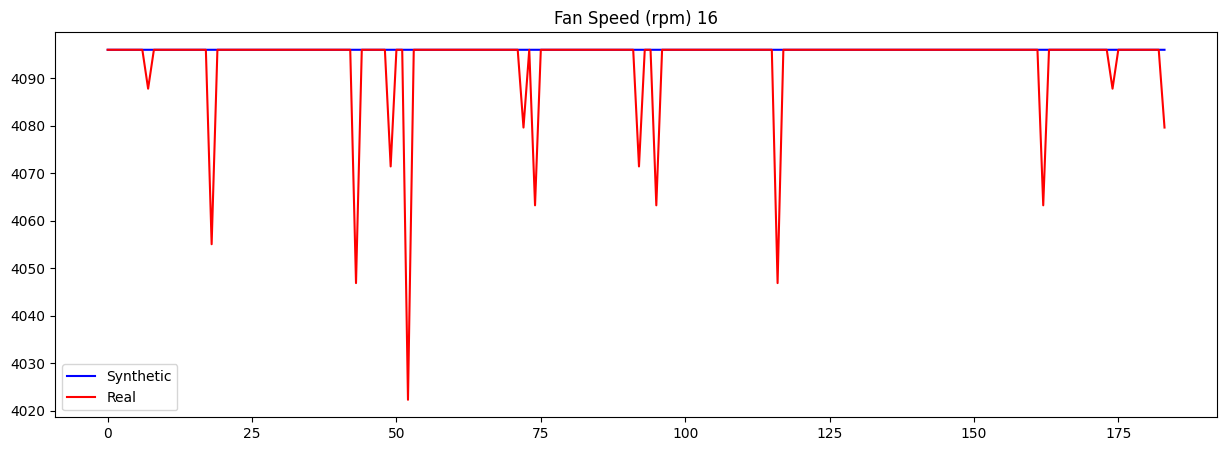

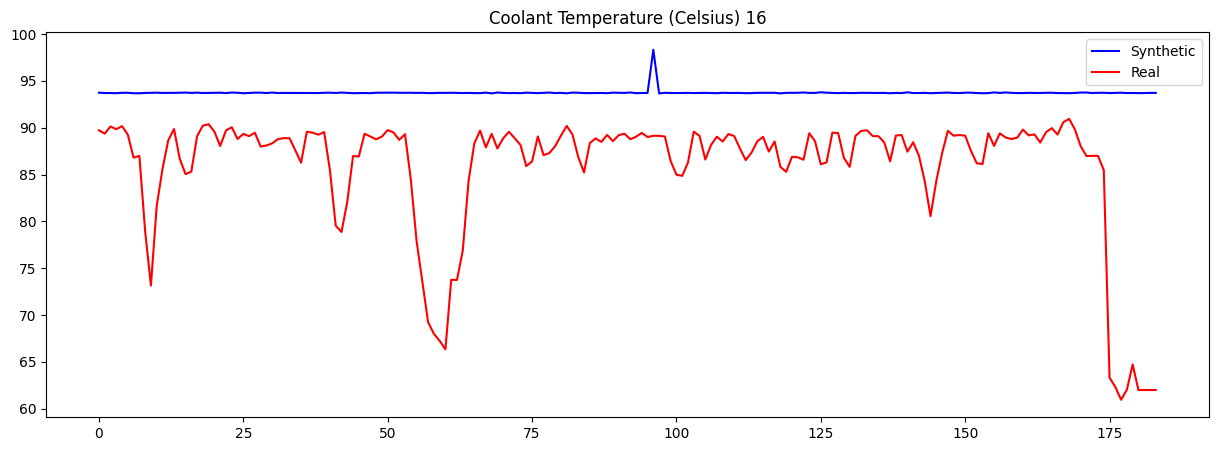

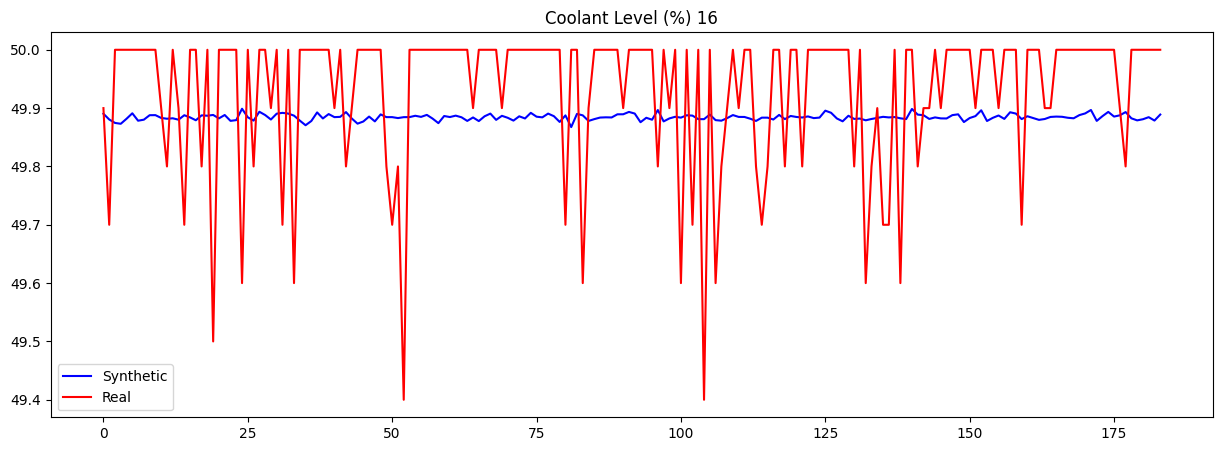

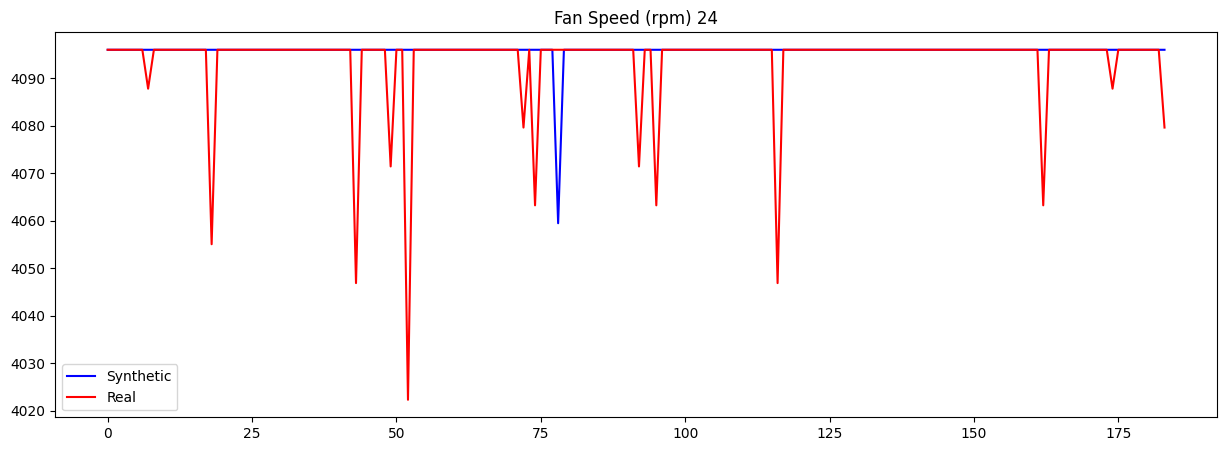

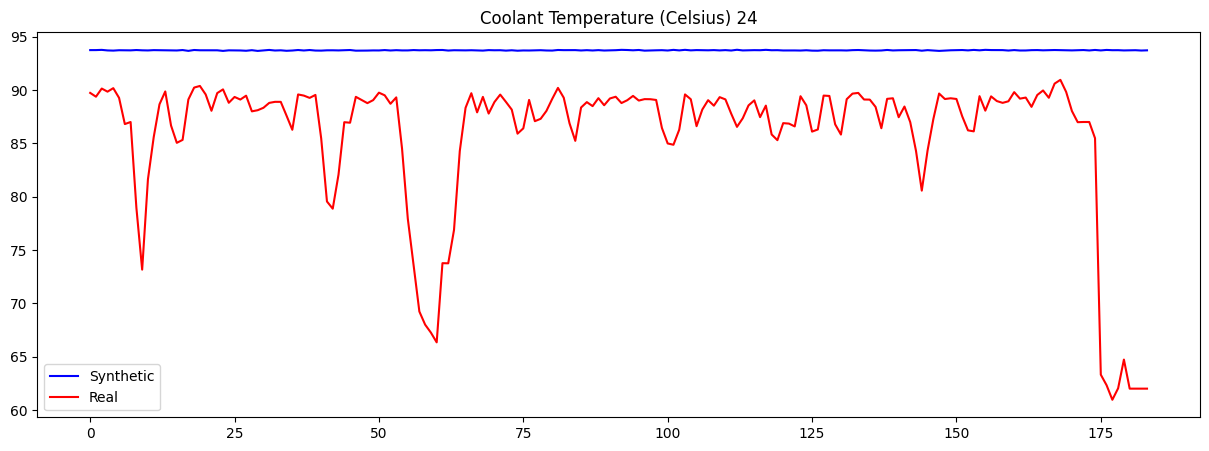

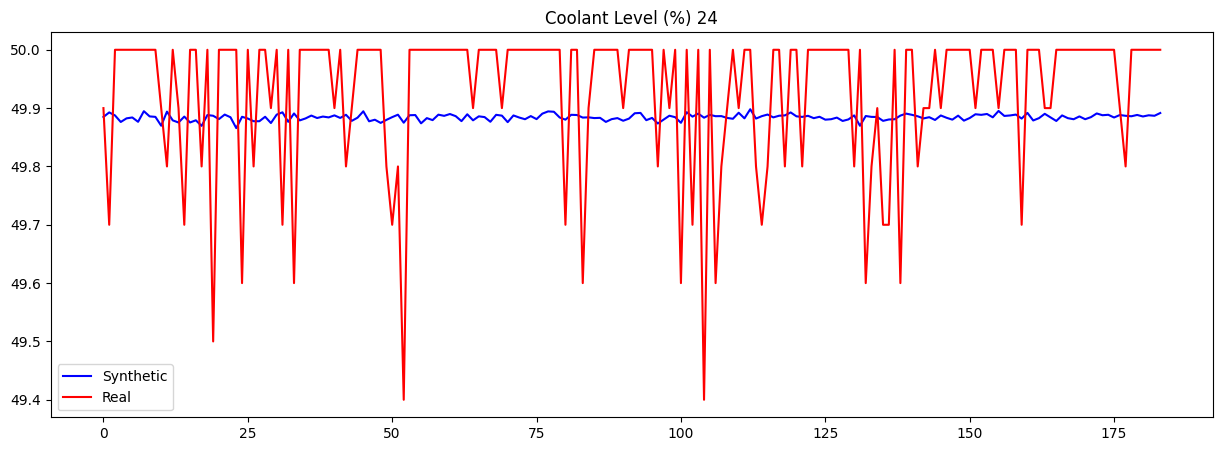

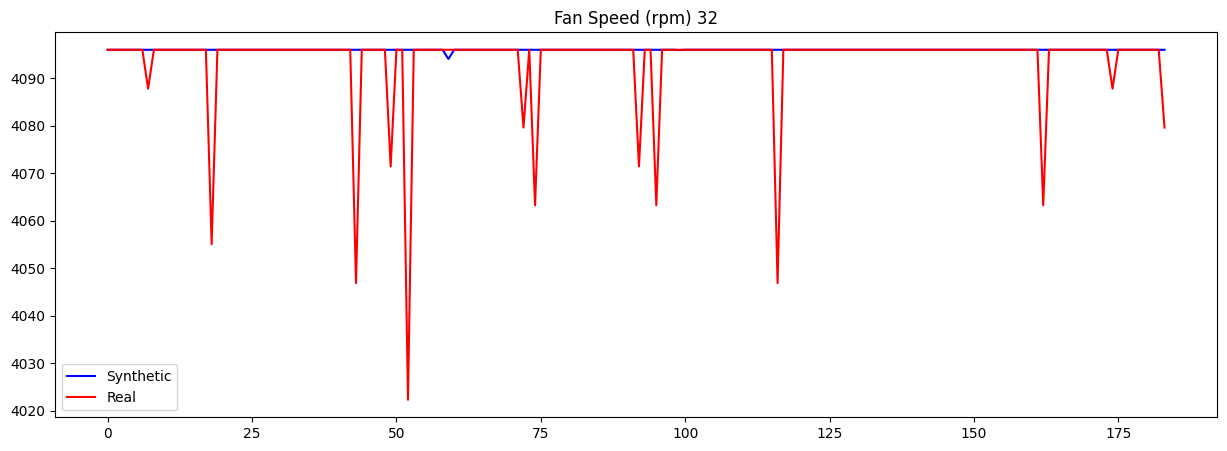

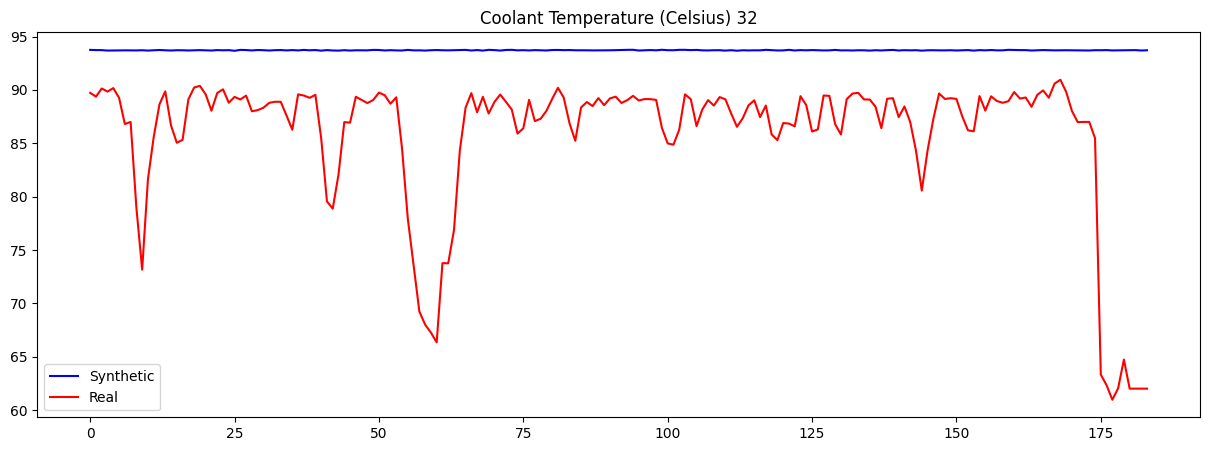

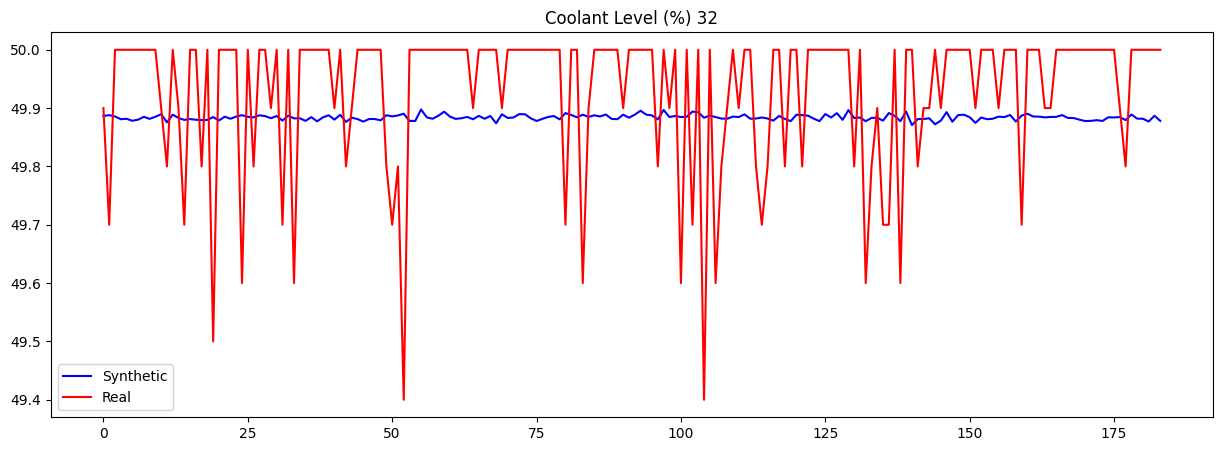

In [67]:
df = df1.copy()
for i in range(39):
    name = "synthetic_cooling+s"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    #plt.figure(figsize=(15,5))
    #v1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
    #v2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
    #plt.title('65213-1639 ' + str(i))
    #plt.plot(np.arange(len(v1)),v1, c='b')
    #plt.plot(np.arange(len(v1)),v2, c='r')
    if i % 8 == 0:
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Fan Speed (rpm) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Coolant Temperature (Celsius) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Coolant Level (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()

    synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [68]:
sdf = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+32.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [69]:
sdf.head()

,65262-110,65263-111,64817-1598
0,93.494354,49.531790,4095.0590
1,93.503720,49.531600,4095.0570
2,93.503750,49.531600,4095.0570
3,93.503750,49.531600,4095.0570
4,93.503720,49.531605,4095.0571


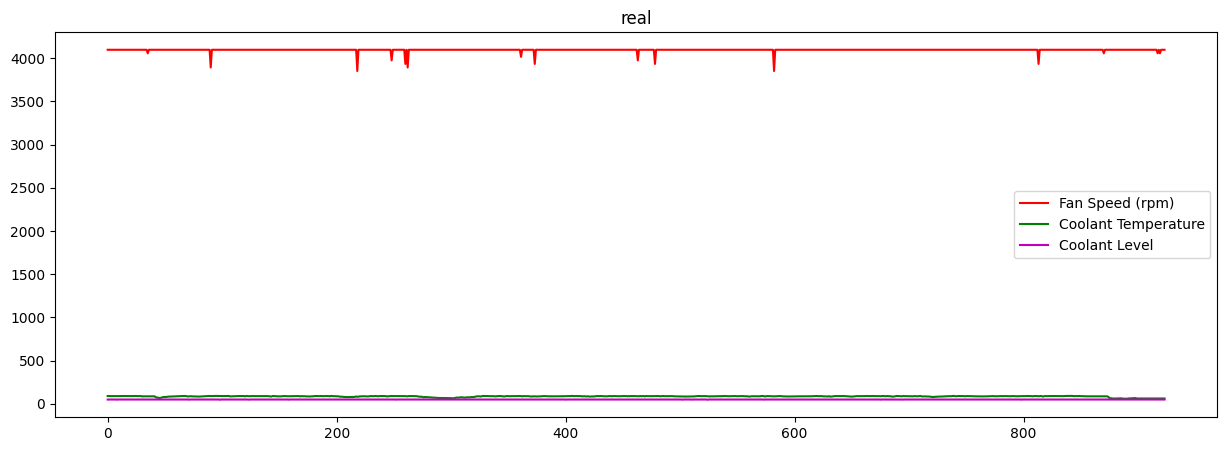

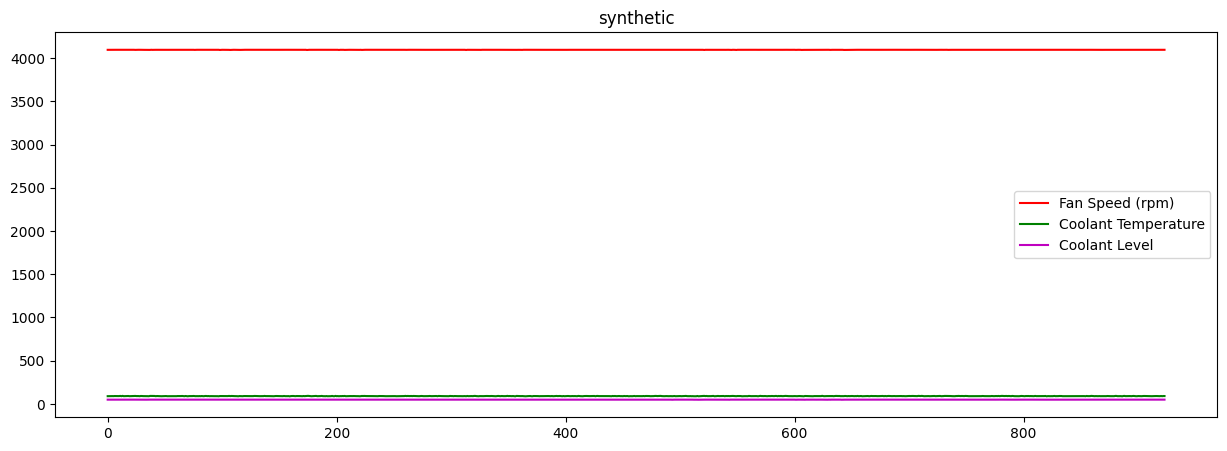

In [70]:
w=100
plt.figure(figsize=(15,5))
#v1 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('real')
#plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v2)),v2, c='r', label='Fan Speed (rpm)')
plt.plot(np.arange(len(v2)),v3, c='g', label='Coolant Temperature')
plt.plot(np.arange(len(v2)),v4, c='m', label='Coolant Level')
plt.legend()
plt.figure(figsize=(15,5))
#v1 = sdf['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v2 = sdf['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('synthetic')
#plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v2)),v2, c='r', label='Fan Speed (rpm)')
plt.plot(np.arange(len(v2)),v3, c='g', label='Coolant Temperature')
plt.plot(np.arange(len(v2)),v4, c='m', label='Coolant Level')
plt.legend()
plt.show()


In [71]:
df1.corr()

,65262-110,65263-111,64817-1598
65262-110,1.000000,-0.008021,-0.003705
65263-111,-0.008021,1.000000,-0.000869
64817-1598,-0.003705,-0.000869,1.000000


In [72]:
sdf.corr()

,65262-110,65263-111,64817-1598
65262-110,1.000000,-0.080666,0.061241
65263-111,-0.080666,1.000000,0.469184
64817-1598,0.061241,0.469184,1.000000


In [73]:
df1.describe()

,65262-110,65263-111,64817-1598
count,92559.000000,92559.000000,92559.000000
mean,85.697523,49.930315,4093.787357
std,7.293955,1.865327,95.174507
min,-40.000000,0.000000,0.000000
25%,86.000000,50.000000,4096.000000
50%,88.000000,50.000000,4096.000000
75%,90.000000,50.000000,4096.000000
max,94.000000,50.000000,4096.000000


In [74]:
sdf.describe()

,65262-110,65263-111,64817-1598
count,92544.000000,92544.000000,92544.000000
mean,90.958613,49.821798,4095.646242
std,1.414631,0.331066,0.518652
min,86.577194,47.401848,4092.109400
25%,89.938126,49.796368,4095.529500
50%,90.839420,49.995106,4095.858400
75%,91.928510,49.999992,4095.966000
max,95.259660,50.000000,4096.000000


In [75]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

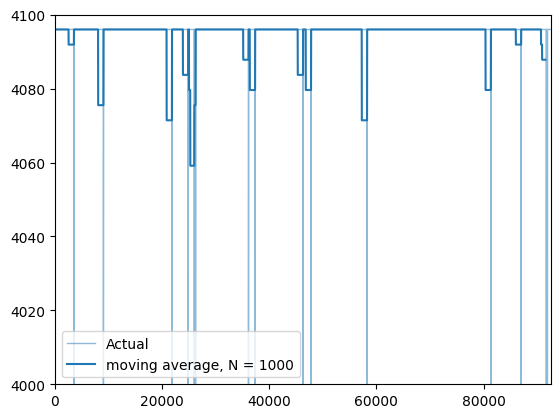

In [95]:

plt.plot(df1['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['64817-1598']))
plt.ylim(4000, 4100)
plt.legend()
plt.show()


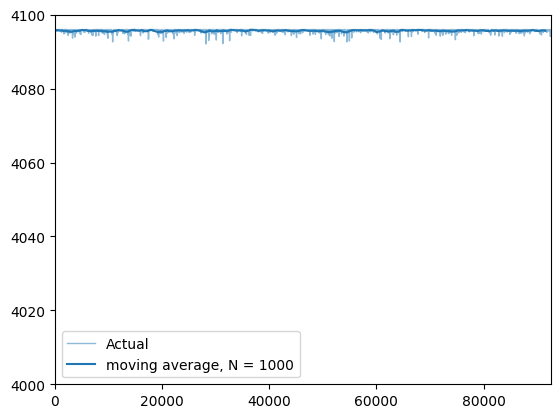

In [91]:

plt.plot(sdf['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['64817-1598']))
plt.ylim(4000, 4100)
plt.legend()
plt.show()


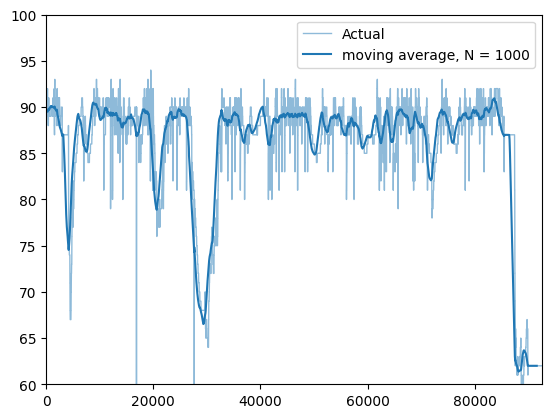

In [96]:
plt.plot(df1['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['65262-110']))
plt.ylim(60, 100)
plt.legend()
plt.show()

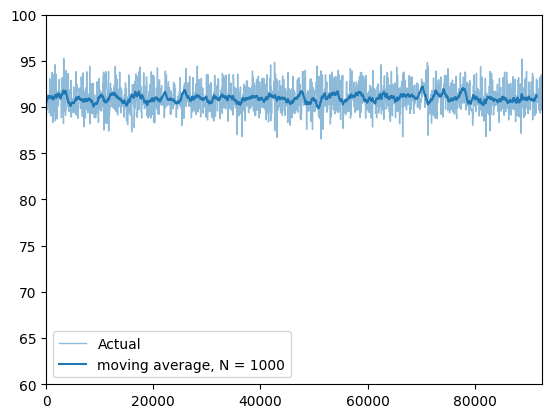

In [97]:
plt.plot(sdf['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['65262-110']))
plt.ylim(60, 100)
plt.legend()
plt.show()

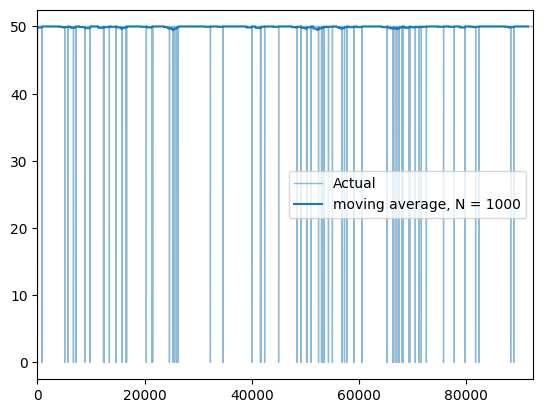

In [80]:
plt.plot(df1['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['65263-111']))
plt.ylim(40, 50)
plt.legend()
plt.show()

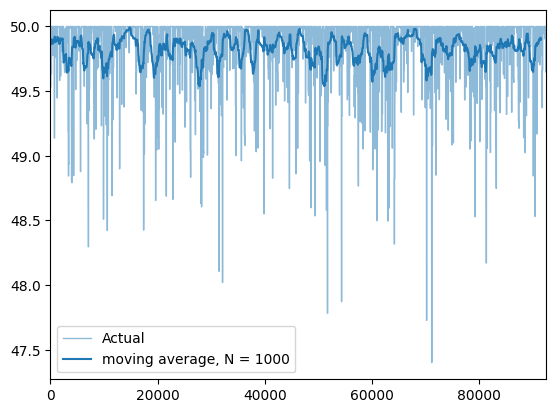

In [81]:
plt.plot(sdf['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['65263-111']))
plt.ylim(40, 50)
plt.legend()
plt.show()

In [82]:
'''
plt.plot(synthetic_df['65213-1639'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
plt.plot(moving_avg(synthetic_df['65213-1639'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(synthetic_df['65213-1639']))
plt.legend()

plt.show()
'''

"\nplt.plot(synthetic_df['65213-1639'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')\nplt.plot(moving_avg(synthetic_df['65213-1639'], 1000), 'C0', label = 'moving average, N = 1000')\nplt.xlim(0,len(synthetic_df['65213-1639']))\nplt.legend()\n\nplt.show()\n"

In [83]:
'''
w = 100
plt.figure()
v1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('64817-1598 ' + str(1))
plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v1)),v2, c='r')
plt.figure()
v1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
v2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('65213-1639 ' + str(1))
plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v1)),v2, c='r')
plt.show()
'''


"\nw = 100\nplt.figure()\nv1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w\nv2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w\nplt.title('64817-1598 ' + str(1))\nplt.plot(np.arange(len(v1)),v1, c='b')\nplt.plot(np.arange(len(v1)),v2, c='r')\nplt.figure()\nv1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w\nv2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w\nplt.title('65213-1639 ' + str(1))\nplt.plot(np.arange(len(v1)),v1, c='b')\nplt.plot(np.arange(len(v1)),v2, c='r')\nplt.show()\n"